# Llamadas a librerías

In [13]:
!pip3 install pdflatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip3 install qiskit ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!wget https://raw.githubusercontent.com/hkhetawat/QArithmetic/master/QArithmetic.py
!wget https://raw.githubusercontent.com/hkhetawat/QArithmetic/master/qft.py

--2022-07-04 11:42:13--  https://raw.githubusercontent.com/hkhetawat/QArithmetic/master/QArithmetic.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13886 (14K) [text/plain]
Saving to: ‘QArithmetic.py.1’

QArithmetic.py.1    100%[===================>]  13.56K  --.-KB/s    in 0s      

2022-07-04 11:42:13 (58.4 MB/s) - ‘QArithmetic.py.1’ saved [13886/13886]

--2022-07-04 11:42:14--  https://raw.githubusercontent.com/hkhetawat/QArithmetic/master/qft.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1820 (1.8K) [text/plain]
Saving

[Tutorial de QArithmetic](https://github.com/hkhetawat/QArithmetic/blob/master/QArithmetic.ipynb)

In [16]:
!pip install quantum-decomp
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install import-ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#from google.colab import drive
#drive.mount('/content/drive')
#!cp /content/drive/MyDrive/Colab\ Notebooks/quantum/*.py .
#!ls .

In [19]:
import pylatexenc
from itertools import chain

In [20]:
import qiskit
from qiskit import IBMQ
from math import gcd,sin,cos,pi,log
from cmath import exp
import numpy as np
from numpy import array
import functools
import sympy
from sympy import Matrix
import math
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise
from qiskit.circuit import Gate

import QArithmetic
import itertools

qiskit.__version__

'0.21.0'

In [23]:
dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
if(dev!="ibmq_qasm_simulator"):
  properties = real_device.properties()
  noise_model = noise.device.basic_device_noise_model(properties)
  coupling_map = real_device.configuration().coupling_map

In [24]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

#from QArithmetic import *

# Diffusor

In [26]:
def Diffusor(circ, f):
    n = len(f)
    
    for i in range(n):
        circ.h(f[i])
        circ.x(f[i])
    circ.barrier(range(n))
    circ.h(f[0])
    circ.mct(list(range(1, n)), 0)
    circ.h(f[0])
    circ.barrier(range(n))
    for i in range(n):
        circ.x(f[i])
        circ.h(f[i])


# Subcircuito nToffoli
- Llamada= `nToffoliGate(n)`, con `n` el número de qbits de control
- El subcircuito devuelto usará `n+(n-1)+1` qbits, los `n` primeros son los de control, los `n-1` siguientes son qbits auxiliares, el último es el resultado

Esta puerta puede usarse para crear el `and` los $1$-qbits de un $n$-qbit

In [31]:
def initQbits(p,n,cad=''):
  a,lambdaI,s=[],[],[]
  for i in range(p):
    #print(n+i//2)
    a.append(QuantumRegister(n,cad+"a"+str(i)))
    lambdaI.append(QuantumRegister(n,cad+"lambda"+str(i)))
    s.append(QuantumRegister(2*n+i,cad+"s"+str(i)))

  qc = QuantumRegister(2*n+p-1,cad+'qc')
  qr = QuantumRegister(1,cad+'qr')
  qaux = QuantumRegister((2*n+p-1)-1,cad+"qaux")
  return a,lambdaI,s,qc,qr,qaux

def valorQR(circ,qreg,v): #toma un registro(qreg) y pone un número en binario en él
  cad=bin(v) #-> 0bxxxxx...
  if len(qreg)<len(cad)-2:
    print("error al convertir en binario")
    return
  i=0
  while cad[-(i+1)]!='b':
    if cad[-(i+1)]=='1':
      circ.x(qreg[i]) #Puerta X
    i=i+1

def nToffoliGate(n):
    ctrl = QuantumRegister(n,'ctrlToffoli')
    anc = QuantumRegister(n-1,'ancToffoli')
    tgt = QuantumRegister(1,'tgtToffoli')

    circ = QuantumCircuit(ctrl, anc, tgt, name='n-Toffoli')
    #qc = QuantumCircuit(1, name='X')

    # compute
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    for i in range(2, n):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])

    # copy
    circ.cx(anc[n-2], tgt[0])

    # uncompute
    for i in range(n-1, 1, -1):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    return circ.to_instruction()

def nToffoliGateN1(n):
    ctrl = QuantumRegister(n,'ctrlToffoli')
    anc = QuantumRegister(n-1,'ancToffoli')
    tgt = QuantumRegister(1,'tgtToffoli')

    circ = QuantumCircuit(ctrl, tgt, anc, name='n-Toffoli n,1,n-1')
    #qc = QuantumCircuit(1, name='X')

    # compute
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    for i in range(2, n):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])

    # copy
    circ.cx(anc[n-2], tgt[0])

    # uncompute
    for i in range(n-1, 1, -1):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    return circ.to_instruction()

## Ejemplo de uso

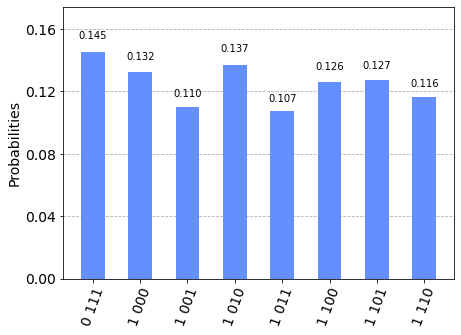

In [32]:
n = 3

subC=nToffoliGate(n)
qa = QuantumRegister(n,"qa")
qaCopia = QuantumRegister(n,"qaCopia")
qaux = QuantumRegister(n-1,"qaux")
qr1 = QuantumRegister(1)

caCopia = ClassicalRegister(n,"caCopia")
cr =ClassicalRegister(1,"resultado")


qcEn = QuantumCircuit(qa, qaux, qr1,qaCopia,caCopia,cr)

qcEn.h(qa)
qcEn.reset(qaux)
qcEn.reset(qr1)
qcEn.x(qr1)

for i in range(n):
    qcEn.cx(qa[i],qaCopia[i])

qcEn.append(subC,list(qa)+list(qaux)+list(qr1))

qcEn.measure(qaCopia,caCopia)
qcEn.measure(qr1,cr)

'''
if(dev!="ibmq_qasm_simulator"):
  job = execute(qcEn, real_device, shots=1024, 
                      coupling_map=coupling_map,
                      basis_gates=noise_model.basis_gates)
else:
  job = execute(qcEn, real_device, shots=1024)
counts=job.result().get_counts()
plot_histogram(counts)'''

simulator = Aer.get_backend('aer_simulator')
job = execute(qcEn, simulator, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [33]:
%matplotlib inline

In [34]:
#qcEn.draw(output='latex')
print( qcEn.draw("latex_source") )

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{qa}_{0} :  } & \lstick{{qa}_{0} :  } & \gate{\mathrm{H}} & \qw & \ctrl{6} & \qw & \qw & \multigate{5}{\mathrm{n\mbox{-}Toffoli}}_<<<{0} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{qa}_{1} :  } & \lstick{{qa}_{1} :  } & \gate{\mathrm{H}} & \qw & \qw & \ctrl{6} & \qw & \ghost{\mathrm{n\mbox{-}Toffoli}}_<<<{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{qa}_{2} :  } & \lstick{{qa}_{2} :  } & \gate{\mathrm{H}} & \qw & \qw & \qw & \ctrl{6} & \ghost{\mathrm{n\mbox{-}Toffoli}}_<<<{2} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{qaux}_{0} :  } & \lstick{{qaux}_{0} :  } & \gate{\mathrm{\left|0\right\rangle}} & \qw & \qw & \qw & \qw & \ghost{\mathrm{n\mbox{-}Toffoli}}_<<<{3} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{qaux}_{1} :  } & \lstick{{qaux}_{1} :  } & \gate{\mathrm{\left|0\right\rangle}} & \qw & \qw & \qw & \qw 

# Igualdad entre dos $n$-qbits
La llamada es de la forma 
`subC=equalityOfTwoNqbits(n)` 
`qcEn.append(subC,list(qa)+list(qb)+list(qc)+list(qr)+list(qaux))`
con `qa`, `qb`, `qc` $n$-qbits
qr un $1$-qbit
y `qaux`un $n-1$-qbit

In [ ]:
def equalityOfTwoNqbits(n):
    qa = QuantumRegister(n,'a')
    qb = QuantumRegister(n,'b')
    qc = QuantumRegister(n,'qc')
    qr = QuantumRegister(1,'qr')
    
    qaux = QuantumRegister(n-1,"qaux")

    circ = QuantumCircuit(qa, qb, qc, qr, qaux, name='equality')
    circ.x(qa)
    QArithmetic.bitwise_xor(circ,qa,qb,qc,n)
    subC=nToffoliGate(n)
    
    circ.append(subC,list(qc)+list(qaux)+list(qr))
    return circ.to_instruction()

## Ejemplo de uso

In [ ]:
p,n=2,3

eq=equalityOfTwoNqbits(2*n+p-1)
b=QuantumRegister(2*n+p-1,"b")
a,lambdaI,s,qc,qr,qaux=initQbits(p,n)
salida=ClassicalRegister(1,"out")

circ=QuantumCircuit(b,*a,*lambdaI,*s,qc,qr,qaux,salida,name="equality")
valorQR(circ,s[-1],3*2+4*5)
valorQR(circ,b,3*2+4*5)
circ.append(eq, list(s[-1])+list(b)+list(qc)+list(qr)+list(qaux) )

print(s[-1])
print(b)
print(qc)
print(qr)
print(qaux)
print(salida)

circ.measure(qr,salida)

circ.draw()

dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
job1 = execute(circ, real_device, shots=1024)
result = job1.result()
counts = result.get_counts()
plot_histogram(counts)
print(counts)

# Sum of list of $p$ $n$-qbits

La llamada es de la forma `subC=additionOfnqbits(p,n)`, donde $p$ es el número de valores a sumar y $n$ es el número de bits del más pequeño

In [ ]:
def additionOfnqbits(p,n):
    lnqbits=[]
    for i in range(p):
        lnqbits.append( QuantumRegister(n+i,'x'+str(i)) )
        #print(n+i)
    circ = QuantumCircuit(*lnqbits, name='p_Addition')
    for i in range(p-1):
        QArithmetic.add(circ,lnqbits[i],lnqbits[i+1],n+i)
    return circ.to_instruction()

## Ejemplo de uso

In [ ]:
p=3
n=3
subC=additionOfnqbits(p,n)
lnqbits=[]
lnqbitsCopy=[]
lnCbits=[]
for i in range(p):
    lnqbits.append( QuantumRegister(n+i,'qx'+str(i)) )
    lnqbitsCopy.append( QuantumRegister(n+i,'qxCopy'+str(i)) )
    lnCbits.append(ClassicalRegister(n+i,'xCopy'+str(i)) )
    
result=ClassicalRegister(n+p-1,"result")

circ=QuantumCircuit(*lnqbits,*lnqbitsCopy,*lnCbits,result)

#circ.x(lnqbits[0][0])
#circ.x(lnqbits[1][0])

for i,(q,qCopia) in enumerate(zip(lnqbits,lnqbitsCopy)):
    circ.h(q[:2])
    circ.cx(q,qCopia)

circ.append(subC,list(itertools.chain.from_iterable(lnqbits)))

for i,(qCopia,cbyte) in enumerate(zip(lnqbitsCopy,lnCbits)):
    circ.measure(qCopia,cbyte)

circ.measure(lnqbits[-1],result)

dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
simulator = Aer.get_backend('aer_simulator')
job1 = execute(circ, simulator, shots=1024)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

#circ.draw('mpl')

In [ ]:
dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
simulator = Aer.get_backend('aer_simulator')
job1 = execute(circ, real_device, shots=1024)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

In [ ]:
plot_histogram(counts)

# Linear combination 
Parece que es mejor la función [WeightedAdder](https://qiskit.org/documentation/stubs/qiskit.circuit.library.WeightedAdder.html#qiskit.circuit.library.WeightedAdder) que trae qiskit

In [ ]:
def linearCombination(p,n):
    lqai=[]
    lqlambdai=[]
    lqauxi=[]
    for i in range(p):
        impar=i%2==1
        lqai.append(QuantumRegister(n,'a'+str(i)))
        lqlambdai.append(QuantumRegister(n,'lambda'+str(i)))
        lqauxi.append(QuantumRegister(2*n+i,'aux'+str(i)))
    circ=QuantumCircuit(*lqai,*lqlambdai,*lqauxi,
                        name='lambda_i*a_i')
    for i in range(p):
      QArithmetic.mult(circ,lqai[i],lqlambdai[i],lqauxi[i][:2*n],len(lqai[i]))
    subcirc=additionOfnqbits(p,2*n)
    circ.append(subcirc, list(itertools.chain.from_iterable(lqauxi)))
    
    return circ #.to_instruction()

## *Ejemplo 1*

In [ ]:
from itertools import chain

In [ ]:
p=2
n=3
lcombC=linearCombination(p,n)

a=[]
lambdaI=[]
s=[]
for i in range(p):
  print(n+i//2)
  a.append(QuantumRegister(n+i//2,"a"+str(i)))
  lambdaI.append(QuantumRegister(n+i//2,"lambda"+str(i)))
  s.append(QuantumRegister(2*n+i,"s"+str(i)))

m=ClassicalRegister(2*n+1)

#qc=QuantumCircuit( a[0], a[1], a[2], lambdaI[0], lambdaI[1], lambdaI[2], s[0], s[1], s[2], m )
qc=QuantumCircuit( a[0], a[1], lambdaI[0], lambdaI[1], s[0], s[1], m )


valorQR(qc,a[0],2)
valorQR(qc,a[1],5)
valorQR(qc,lambdaI[0],5)
valorQR(qc,lambdaI[1],3)
qc.h([0])
print(len(list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s))))
qc.append(lcombC,list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s)) )

qc.measure(s[1],m)

qc.draw()

In [ ]:
dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
simulator = Aer.get_backend('aer_simulator')
job1 = execute(qc, real_device, shots=1024)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

In [ ]:
linearCombination(3,2).draw('mpl')

##*Ejemplo 2*

In [ ]:
p=2
n=3
lcombC=linearCombination(p,n)

a=[]
lambdaI=[]
s=[]
for i in range(p):
  print(n+i//2)
  a.append(QuantumRegister(n+i//2,"a"+str(i)))
  lambdaI.append(QuantumRegister(n+i//2,"lambda"+str(i)))
  s.append(QuantumRegister(2*n+i,"s"+str(i)))

m=ClassicalRegister(2*n+1)

#qc=QuantumCircuit( a[0], a[1], a[2], lambdaI[0], lambdaI[1], lambdaI[2], s[0], s[1], s[2], m )
qc=QuantumCircuit( a[0], a[1],  lambdaI[0], lambdaI[1], s[0], s[1], m )


valorQR(qc,a[0],2)
valorQR(qc,a[1],5)
#valorQR(qc,a[2], 1)
valorQR(qc,lambdaI[0],5)
valorQR(qc,lambdaI[1],3)
#valorQR(qc,lambdaI[2],3)
qc.h([0])
print(len(list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s))))
qc.append(lcombC,list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s)) )

qc.measure(s[1],m)

qc.draw()

# Igualdad de $b$ con $\sum_{i=1}^p a_i\lambda_i$

In [ ]:
def equalityOfLCwithB(p,n):
  '''
  en append poner(b,*a,*lambdaI,*s,qc,qr,qaux)
  (2*n+p-1,\n[n+i//2 for i in range(p)],
  cad=cad+"[n+i//2 for i in range(p)],
  cad=cad+"\n[n+i//2 for i in range(p)],
  cad=cad+"2*n+p-1,1,2*n+p-2)
  '''
  b=QuantumRegister(2*n+p-1,"b")
  #a=[]
  #lambdaI=[]
  #s=[]
  a,lambdaI,s,qc,qr,qaux=initQbits(p,n)

  lcombC=linearCombination(p,n)
  eq=equalityOfTwoNqbits(2*n+p-1)
  #subC=equalityOfTwoNqbits(n)
  cad="eq\n(b,*a,*lambdaI,*s,qc,qr,qaux)"
  cad=cad+"(2*n+p-1,\n[n+i//2 for i in range(p)],"
  cad=cad+"[n+i//2 for i in range(p)],"
  cad=cad+"\n[n+i//2 for i in range(p)],"
  cad=cad+"2*n+p-1,1,2*n+p-2)"
  print(cad)
  circ=QuantumCircuit(b,*a,*lambdaI,*s,qc,qr,qaux,name="equality")

  circ.append(lcombC,\
              list( chain.from_iterable(a) )+\
              list( chain.from_iterable(lambdaI) )+\
              list( chain.from_iterable(s) ) )
  
  
  print(s[-1])
  print(b)
  print(qc)
  print(qr)
  print(qaux)
  print(salida)
  print(2*n+p-1) 

  circ.append(eq, list(s[-1])+list(b)+list(qc)+list(qr)+list(qaux) )
  #qcEn.append(subC,list(qa)+list(qb)+list(qc)+list(qr)+list(qaux))

  return circ.to_instruction()

## Ejemplo (falla con $p=2$ y $n=3$, no sé por qué!)

In [ ]:
# tenemos 2 generadores de 4 bits (2**6-1=63 es el valor máximo para estos números)
# el valor de b puede llegar hasta 2^(2*n+p-1)-1=16383
p,n=2,3
b=QuantumRegister(2*n+p-1,"b")
a,lambdaI,s,qc,qr,qaux=initQbits(p,n)
salida=ClassicalRegister(1,"out")
subCircEq=equalityOfLCwithB(p,n)

circ=QuantumCircuit(b,*a,*lambdaI,*s,qc,qr,qaux,salida) #,qminus)
# si no me equivoco, con esto ya tenemos un Grover Oracle
#circ.x(qr)
#circ.h(qr)

valorQR(circ,a[0],2)
valorQR(circ,a[1],5)
#valorQR(circ,a[2],5)
valorQR(circ,lambdaI[0],3)
valorQR(circ,lambdaI[1],4)
#valorQR(circ,lambdaI[2],1)

# si ponemos b igual a la combinación a_0*lambda_0+a_1*lambda_1+a_2*lambda_2,
# tiene que dar 1. Para otro valor de b tiene que dar 0
valorQR(circ,b,3*2+4*5)

circ.append(subCircEq,list(b)+\
          list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s))+\
          list(qc)+list(qr)+list(qaux) )

print(s[-1])
print(b)
print(qc)
print(qr)
print(qaux)
print(salida)

circ.measure(qr,salida)
circ.draw()

In [ ]:
dev='ibmq_qasm_simulator'
real_device = prov.get_backend(dev)
#simulator = Aer.get_backend('aer_simulator')
job1 = execute(circ, real_device, shots=1000)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

El número de vueltas que tenemos que dar en Grover es de $\sqrt{2^{\sum_{i=0}^{p-1}n+\lfloor \frac{i}2\rfloor}}$

In [ ]:
p,n=2,3
#sum([n+i//2 for i in range(p)])
math.sqrt( 2**( sum([n+i//2 for i in range(p)]) ) )

# Función $U_s$ para Grover

In [ ]:
def difussorUn(n):
  qa=QuantumRegister(n,"qa")
  qaux=QuantumRegister(n-2,"qaux")
  qcUn=QuantumCircuit(qa,qaux,name="Diffuser("+str(n)+","+str(n-2)+" aux)")

  qcUn.h(qa)
  subC=nToffoliGateN1(n-1)
  for i in range(n):
    qcUn.x(i)
  qcUn.h(n-1)
  qcUn.append(subC,list(qa[:n-1])+list(qa[n-1:n])+list(qaux))
  qcUn.h(n-1)
  qcUn.barrier()
  for i in range(n):
    qcUn.x(i)
  qcUn.h(qa)

  return qcUn.to_instruction()

In [ ]:
n=3
qa=QuantumRegister(n,"qa")
qaux=QuantumRegister(n-2,"qaux")
qcUn=QuantumCircuit(qa,qaux,name="Diffuser("+str(n)+"-"+str(n-2)+")")

subQC=difussorUn(n)
qcUn.append(subQC,list(qa)+list(qaux))

backend = Aer.get_backend('unitary_simulator')
job = execute(qcUn, backend)
result = job.result()
mU=np.array( result.get_unitary(qcUn, decimals=3) )
for j,f in enumerate(mU):
  if j<2**n:
    for i,x in enumerate(f):
      if i <2**n:
        print("{:9}".format(x),end=' ')
    print()
qcUn.draw()

(0.75+0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (0.75+0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (0.75+0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (-0.25-0j) (0.75+0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (0.75+0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (0.75+0j) (-0.25-0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (0.75+0j) (-0.25-0j) 
(-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (-0.25-0j) (0.75+0j) 


┌────────────────────┐
qa_0: ┤0                   ├
      │                    │
qa_1: ┤1                   ├
      │  Diffuser(3,1 aux) │
qa_2: ┤2                   ├
      │                    │
qaux: ┤3                   ├
      └────────────────────┘

In [ ]:
n=3
qa=QuantumRegister(n,"qa")
qaux=QuantumRegister(n-2,"qaux")
qcUn=QuantumCircuit(qa,qaux,name="Diffuser("+str(n)+"-"+str(n-2)+")")

subC=nToffoliGateN1(n-1)
for i in range(n):
  qcUn.x(i)
qcUn.h(n-1)
#qcUn.cccx(0,1,2,3)
qcUn.append(subC,list(qa[:n-1])+list(qa[n-1:n])+list(qaux))
qcUn.h(n-1)
qcUn.barrier()
for i in range(n):
  qcUn.x(i)

backend = Aer.get_backend('unitary_simulator')
job = execute(qcUn, backend)
result = job.result()
mU=result.get_unitary(qcUn, decimals=3)
for j,f in enumerate(mU):
  if j<2**n:
    for i,x in enumerate(f):
      if i <2**n:
        print("{:7}".format(x),end=' ')
    print()
qcUn.draw()

TypeError: ignored

## Ejemplo

In [ ]:
n=6
qcD=difussorUn(n)
qrA=QuantumRegister(n,"qr_a")
qrAux=QuantumRegister(n-2,"qrAux_a")

circ=QuantumCircuit(qrA,qrAux)
circ.append(qcD,list(qrA)+list(qrAux))

circ.draw()

# Composición de `eq` con `Diffusor`

In [ ]:
p,n=2,3
lenLambda=sum([n+i//2 for i in range(p)])
nvueltas=math.sqrt(2**sum([n+i//2 for i in range(p)]))
print("Entradas constantes de a[] y b con {} y {} qbits, resp.".format(lenLambda,2*n+p-1))
print("qbits en entrada de lambda_I",lenLambda)
print("Nº de vueltas (sqrt(N)):",nvueltas)

In [ ]:
p,n=2,3
lenLambda=sum([n+i//2 for i in range(p)])
b=QuantumRegister(2*n+p-1,"b")
a,lambdaI,s0,qc0,qr0,qaux0=initQbits(p,n,'q0')
_,_,s1,qc1,qr1,qaux1=initQbits(p,n,'q1')
#_,_,s2,qc2,qr2,qaux2=initQbits(p,n,'q2')
#_,_,s3,qc3,qr3,qaux3=initQbits(p,n,'q3')
qrAuxDiff0=QuantumRegister(lenLambda-2,"qrAux0")
qrAuxDiff1=QuantumRegister(lenLambda-2,"qrAux1")
#qrAuxDiff2=QuantumRegister(lenLambda-2,"qrAux2")
#qrAuxDiff3=QuantumRegister(lenLambda-2,"qrAux3")

subCircEq0=equalityOfLCwithB(p,n)
qcD0=difussorUn(lenLambda)
subCircEq1=equalityOfLCwithB(p,n)
qcD1=difussorUn(lenLambda)
#subCircEq2=equalityOfLCwithB(p,n)
#qcD2=difussorUn(lenLambda)
'''subCircEq3=equalityOfLCwithB(p,n)
qcD3=difussorUn(lenLambda)'''

salida=ClassicalRegister(lenLambda,"out")

circ=QuantumCircuit(b,*a,*lambdaI,*s0,*s1,qc0,qc1,\
                    qr0,qr1,qaux0,qaux1,salida,\
                    qrAuxDiff0,qrAuxDiff1)
'''
circ=QuantumCircuit(b,*a,*lambdaI,*s0,*s1,*s2,qc0,qc1,qc2,\
                    qr0,qr1,qr2,qaux0,qaux1,qaux2,salida,\
                    qrAuxDiff0,qrAuxDiff1,qrAuxDiff2)'''
#circ=QuantumCircuit(b,*a,*lambdaI,*s0,*s1,*s2,*s3,qc0,qc1,qc2,qc3,\
#                    qr0,qr1,qr2,qr3,qaux0,qaux1,qaux2,qaux3,salida,\
#                    qrAuxDiff0,qrAuxDiff1,qrAuxDiff2,qrAuxDiff3)
# si no me equivoco, con esto ya tenemos un Grover Oracle
circ.x(qr0)
circ.h(qr0)
circ.x(qr1)
circ.h(qr1)
'''
circ.x(qr2)
circ.h(qr2)'''
'''
circ.x(qr3)
circ.h(qr3)'''
valorQR(circ,a[0],3)
valorQR(circ,a[1],4)
circ.h(lambdaI[0])
circ.h(lambdaI[1])
# si ponemos b igual a la combinación a_0*lambda_0+a_1*lambda_1+a_2*lambda_2,
# tiene que dar 1. Para otro valor de b tiene que dar 0
valorQR(circ,b,3*2+4*2)

circ.append(subCircEq0,list(b)+\
          list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s0))+\
          list(qc0)+list(qr0)+list(qaux0) )
circ.append(qcD0,list(chain.from_iterable(lambdaI))+list(qrAuxDiff0))
circ.append(subCircEq1,list(b)+\
          list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s1))+\
          list(qc1)+list(qr1)+list(qaux1) )
circ.append(qcD1,list(chain.from_iterable(lambdaI))+list(qrAuxDiff1))
'''
circ.append(subCircEq2,list(b)+\
          list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s2))+\
          list(qc2)+list(qr2)+list(qaux2) )
circ.append(qcD2,list(chain.from_iterable(lambdaI))+list(qrAuxDiff2))'''
'''
circ.append(subCircEq3,list(b)+\
          list(chain.from_iterable(a))+\
          list(chain.from_iterable(lambdaI))+\
          list(chain.from_iterable(s3))+\
          list(qc3)+list(qr3)+list(qaux3) )
circ.append(qcD3,list(chain.from_iterable(lambdaI))+list(qrAuxDiff3))'''



circ.measure(list(chain.from_iterable(lambdaI)),salida)


dev='ibmq_qasm_simulator'
#dev='simulator_extended_stabilizer'
#dev='simulator_mps'
real_device = prov.get_backend(dev)
#simulator = Aer.get_backend('aer_simulator')
job1 = execute(circ, real_device, shots=1024)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)
#circ.draw()

In [ ]:
counts['00100010']

# Combinación lineal (LC), Eq, etc.

In [ ]:
p,n=2,4
qb=QuantumRegister(2*n+p-1,"qb")
lqa=[QuantumRegister(n,"lqa["+str(i)+"]") for i in range(p)]
lqlambda=[QuantumRegister(n,"lqlambda["+str(i)+"]") for i in range(p)]
lqalambda=[QuantumRegister(2*n+i,"lqalambda["+str(i)+"]") for i in range(p)]
#qauxEq=QuantumRegister(2*(2*n+p-1)-1,"qauxEq")
qauxEq=QuantumRegister(2*n+p-1-1,"qauxEq")
qr=QuantumRegister(1,"qr")

#qauxDiff=QuantumRegister(n*p-2,"qauxDiff")

raux=ClassicalRegister(1,"resultado")
#raux=ClassicalRegister(2*n+p-1)

qCirc=QuantumCircuit(*lqa,*lqlambda,*lqalambda,qb,qr,qauxEq,raux,name="b=lc(a,lambda)")

sgS=[3,7]
for i,x in enumerate(sgS):
  valorQR(qCirc,lqa[i],x)
coefL=[3,4]
for i,x in enumerate(coefL):
  valorQR(qCirc,lqlambda[i],x)
valorQR(qCirc,qb,sum([x*y for x,y in zip(sgS,coefL)])+1)

for i in range(p):
  qcauxr=QuantumRegister(4*n)
  qcaux=QuantumCircuit(qcauxr,name='mult{0}'.format(i))
  QArithmetic.mult(qcaux, qcauxr[0:n],qcauxr[n:2*n],qcauxr[2*n:4*n], n)
  laux=list(lqa[i])+list(lqlambda[i])+list(lqalambda[i][:2*n])
  qCirc.append(qcaux.to_instruction(),laux)

for i in range(p-1):
  qcauxr=QuantumRegister(2*n+i+2*n+i+1)
  qcaux=QuantumCircuit(qcauxr,name='sum {0} {1}'.format(i,i+1))
  QArithmetic.add(qcaux,qcauxr[0:2*n+i],qcauxr[2*n+i:],2*n+i)
  laux=list(lqalambda[i])+list(lqalambda[i+1])
  qCirc.append(qcaux,laux)

#qc1=eqOfNqbits(2*n+p-1)
#qCirc.append(qc1,list(lqalambda[-1])+list(qb)+list(qr)+list(qauxEq))

qcauxr=QuantumRegister((2*n+p-1)*2)
qcaux=QuantumCircuit(qcauxr,name='resta')
QArithmetic.sub(qcaux,qcauxr[0:2*n+p-1],qcauxr[2*n+p-1:],2*n+p-1)
laux=list(qb)+list(lqalambda[-1])
qCirc.append(qcaux,laux)
#qCirc.measure(lqalambda[-1],raux)

qCirc.x(lqalambda[-1])
qcauxNT=nToffoliGateN1(2*n+p-1)
qCirc.append(qcauxNT,list(lqalambda[-1])+[qr]+list(qauxEq))

qCirc.measure(qr,raux)
print(qCirc.num_qubits)

NameError: ignored

In [ ]:
qCirc.draw('mpl')

In [ ]:
dev='ibmq_qasm_simulator'
dev='simulator_mps'
real_device = prov.get_backend(dev)
#simulator = Aer.get_backend('aer_simulator')
job1 = execute(qCirc, real_device, shots=1000)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

Ejecución en ibmq_qasm_simulator: {'0': 1000}


In [ ]:
p,n=2,4
qb=QuantumRegister(2*n+p-1,"qb")
lqa=[QuantumRegister(n,"lqa["+str(i)+"]") for i in range(p)]
lqlambda=[QuantumRegister(n,"lqlambda["+str(i)+"]") for i in range(p)]
lqalambda=[QuantumRegister(2*n+i,"lqalambda["+str(i)+"]") for i in range(p)]
#qauxEq=QuantumRegister(2*(2*n+p-1)-1,"qauxEq")
qauxEq=QuantumRegister(2*n+p-1-1,"qauxEq")
qr=QuantumRegister(1,"qr")

qauxDiff=QuantumRegister(n*p-2,"qauxDiff")

#raux=ClassicalRegister(1,"resultado")
#raux=ClassicalRegister(2*n+p-1)
lr=[ClassicalRegister(n,"r["+str(i)+"]") for i in range(p)]

qCirc=QuantumCircuit(*lqa,*lqlambda,*lqalambda,qb,qr,qauxEq,*lr,qauxDiff,name="b=lc(a,lambda)")

sgS=[3,7]
for i,x in enumerate(sgS):
  valorQR(qCirc,lqa[i],x)

#coefL=[3,4]
#for i,x in enumerate(coefL):
#  valorQR(qCirc,lqlambda[i],x)
for q in lqlambda:
  qCirc.h(q)
qCirc.x(qr)
qCirc.h(qr)

valorQR(qCirc,qb,3*3+4*7)

###
for i in range(p):
  qcauxr=QuantumRegister(4*n)
  qcaux=QuantumCircuit(qcauxr,name='mult{0}'.format(i))
  QArithmetic.mult(qcaux, qcauxr[0:n],qcauxr[n:2*n],qcauxr[2*n:4*n], n)
  laux=list(lqa[i])+list(lqlambda[i])+list(lqalambda[i][:2*n])
  qCirc.append(qcaux.to_instruction(),laux)

for i in range(p-1):
  qcauxr=QuantumRegister(2*n+i+2*n+i+1)
  qcaux=QuantumCircuit(qcauxr,name='sum {0} {1}'.format(i,i+1))
  QArithmetic.add(qcaux,qcauxr[0:2*n+i],qcauxr[2*n+i:],2*n+i)
  laux=list(lqalambda[i])+list(lqalambda[i+1])
  qCirc.append(qcaux,laux)

#qc1=eqOfNqbits(2*n+p-1)
#qCirc.append(qc1,list(lqalambda[-1])+list(qb)+list(qr)+list(qauxEq))

qcauxr=QuantumRegister((2*n+p-1)*2)
qcaux=QuantumCircuit(qcauxr,name='resta')
QArithmetic.sub(qcaux,qcauxr[0:2*n+p-1],qcauxr[2*n+p-1:],2*n+p-1)
laux=list(qb)+list(lqalambda[-1])
qCirc.append(qcaux,laux)
#qCirc.measure(lqalambda[-1],raux)

qCirc.x(lqalambda[-1])
qcauxNT=nToffoliGate(2*n+p-1)
qCirc.append(qcauxNT,list(lqalambda[-1])+list(qauxEq)+[qr])

subCD=difussorUn(p*n)

qCirc.barrier()

qCirc.append(subCD, list(chain.from_iterable([list(x) for x in lqlambda]))+list(qauxDiff))

for i in range(p):
  qCirc.measure(lqlambda[i],lr[i])
print(qCirc.num_qubits)

57


In [ ]:
qCirc.draw('mpl')

In [ ]:
dev='ibmq_qasm_simulator'
dev='simulator_mps'
real_device = prov.get_backend(dev)
#simulator = Aer.get_backend('aer_simulator')
job1 = execute(qCirc, real_device, shots=1000)
counts=job1.result().get_counts()
print("Ejecución en ibmq_qasm_simulator:",counts)

Ejecución en ibmq_qasm_simulator: {'0000 0000': 2, '0000 0001': 9, '0001 0000': 2, '0001 0001': 6, '0001 0010': 3, '0001 0011': 7, '0001 0100': 3, '0001 0101': 6, '0001 0110': 6, '0001 0111': 6, '0001 1000': 5, '0001 1001': 2, '0001 1010': 4, '0001 1011': 3, '0001 1100': 2, '0001 1101': 4, '0001 1110': 4, '0001 1111': 5, '0000 0010': 4, '0010 0000': 3, '0010 0001': 1, '0010 0010': 2, '0010 0011': 5, '0010 0100': 4, '0010 0101': 6, '0010 0110': 7, '0010 0111': 4, '0010 1000': 5, '0010 1001': 5, '0010 1010': 4, '0010 1011': 5, '0010 1100': 5, '0010 1101': 5, '0010 1110': 4, '0010 1111': 3, '0000 0011': 6, '0011 0000': 5, '0011 0001': 3, '0011 0010': 3, '0011 0011': 2, '0011 0100': 4, '0011 0101': 2, '0011 0110': 3, '0011 0111': 3, '0011 1000': 3, '0011 1001': 6, '0011 1010': 3, '0011 1011': 3, '0011 1100': 4, '0011 1101': 5, '0011 1110': 2, '0011 1111': 5, '0000 0100': 2, '0100 0000': 2, '0100 0001': 4, '0100 0010': 5, '0100 0011': 8, '0100 0100': 3, '0100 0101': 8, '0100 0110': 2, '0100

In [ ]:
for x in counts:
  print(tuple( [int(i,2) for i in x.split()] ),counts[x])

## Definición de vueltaGrLC(p,n)
- qb: tamaño 2*n+p-1, fijo
- lqa: lista de p, tamaño n, fijo
- lqlambda: lista de p, tamaño n, se inicializa con 
```
    for q in lqlambda:
      qCirc.h(q)
```
- lqalambda: lista de p, tamaño 2*n+i, auxiliar
- qauxEq: tamaño 2*n+p-1+1, auxiliar
- qr: tamaño 1
- qauxDiff: tamaño n*p-2, auxiliar

In [ ]:
def vueltaGrLC(p,n):
  #p,n=2,4
  qb=QuantumRegister(2*n+p-1,"qb")
  lqa=[QuantumRegister(n,"lqa["+str(i)+"]") for i in range(p)]
  lqlambda=[QuantumRegister(n,"lqlambda["+str(i)+"]") for i in range(p)]
  lqalambda=[QuantumRegister(2*n+i,"lqalambda["+str(i)+"]") for i in range(p)]
  qauxEq=QuantumRegister(2*n+p-1-1,"qauxEq")
  qr=QuantumRegister(1,"qr")
  qauxDiff=QuantumRegister(n*p-2,"qauxDiff")

  qCirc=QuantumCircuit(*lqa,*lqlambda,*lqalambda,qb,qr,qauxEq,qauxDiff,name="b=lc(a,lambda)")

  qCirc.x(qr)
  qCirc.h(qr)

  valorQR(qCirc,qb,3*3+4*7)

  for i in range(p):
    qcauxr=QuantumRegister(4*n)
    qcaux=QuantumCircuit(qcauxr,name='mult{0}'.format(i))
    QArithmetic.mult(qcaux, qcauxr[0:n],qcauxr[n:2*n],qcauxr[2*n:4*n], n)
    laux=list(lqa[i])+list(lqlambda[i])+list(lqalambda[i][:2*n])
    qCirc.append(qcaux.to_instruction(),laux)

  for i in range(p-1):
    qcauxr=QuantumRegister(2*n+i+2*n+i+1)
    qcaux=QuantumCircuit(qcauxr,name='sum {0} {1}'.format(i,i+1))
    QArithmetic.add(qcaux,qcauxr[0:2*n+i],qcauxr[2*n+i:],2*n+i)
    laux=list(lqalambda[i])+list(lqalambda[i+1])
    qCirc.append(qcaux,laux)

  qcauxr=QuantumRegister((2*n+p-1)*2)
  qcaux=QuantumCircuit(qcauxr,name='resta')
  QArithmetic.sub(qcaux,qcauxr[0:2*n+p-1],qcauxr[2*n+p-1:],2*n+p-1)
  laux=list(qb)+list(lqalambda[-1])
  qCirc.append(qcaux,laux)
  #qCirc.measure(lqalambda[-1],raux)

  qCirc.x(lqalambda[-1])
  qcauxNT=nToffoliGate(2*n+p-1)
  qCirc.append(qcauxNT,list(lqalambda[-1])+list(qauxEq)+[qr])

  subCD=difussorUn(p*n)

  qCirc.barrier()

  qCirc.append(subCD, list(chain.from_iterable([list(x) for x in lqlambda]))+list(qauxDiff))

  #for i in range(p):
  #  qCirc.measure(lqlambda[i],lr[i])
  print(qCirc.num_qubits)

  return qCirc.to_instruction()

In [ ]:
p,n=2,4
qb=QuantumRegister(2*n+p-1,"qb")
lqa=[QuantumRegister(n,"lqa["+str(i)+"]") for i in range(p)]
lqlambda=[QuantumRegister(n,"lqlambda["+str(i)+"]") for i in range(p)]
lr=[ClassicalRegister(n,"r["+str(i)+"]") for i in range(p)]

lqalambda1=[QuantumRegister(2*n+i,"lqalambda["+str(i)+"]1") for i in range(p)]
qauxEq1=QuantumRegister(2*n+p-1-1,"qauxEq1")
qr1=QuantumRegister(1,"qr1")
qauxDiff1=QuantumRegister(n*p-2,"qauxDiff1")

lqalambda2=[QuantumRegister(2*n+i,"lqalambda["+str(i)+"]2") for i in range(p)]
qauxEq2=QuantumRegister(2*n+p-1-1,"qauxEq2")
qr2=QuantumRegister(1,"qr2")
qauxDiff2=QuantumRegister(n*p-2,"qauxDiff2")

subQC1=vueltaGrLC(p,n)
subQC2=vueltaGrLC(p,n)

qCirc=QuantumCircuit(qb,*lqa,*lqlambda,*lqalambda1,*lqalambda2,qauxEq1,qauxEq2,qr1,qr2,\
                     qauxDiff1,qauxDiff2,*lr)

sgS=[3,7]
for i,x in enumerate(sgS):
  valorQR(qCirc,lqa[i],x)
for q in lqlambda:
  qCirc.h(q)
qCirc.x(qr1)
qCirc.h(qr1)
qCirc.x(qr2)
qCirc.h(qr2)
valorQR(qCirc,qb,3*3+4*7)

qCirc.append(subQC1,list(chain.from_iterable(lqa))+\
             list(chain.from_iterable(lqlambda))+\
             list(chain.from_iterable(lqalambda1))+list(qb)+list(qr1)+\
             list(qauxEq1)+list(qauxDiff1))

qCirc.append(subQC2,list(chain.from_iterable(lqa))+\
             list(chain.from_iterable(lqlambda))+\
             list(chain.from_iterable(lqalambda2))+list(qb)+list(qr2)+\
             list(qauxEq2)+list(qauxDiff2))

for i in range(p):
  qCirc.measure(lqlambda[i],lr[i])
print(qCirc.num_qubits)

57
57
89


In [35]:
qCirc.draw('mpl')

NameError: ignored

In [ ]:
for x in counts:
  print(tuple( [int(i,2) for i in x.split()] ),counts[x])